In [1]:
# REQUIREMENTS
#
# pip install pandas
# pip install matplotlib
# pip install numpy
# pip install scikit-learn
# pip install scipy
# pip install statsmodels
# pip install seaborn
# FILE STRUCTURE
#
# │   ergasia.ipynb
# │   mosleh_et_al_data.csv

## Twitter Suspensions after the 2020 Election

# find the ratio of suspension:
# suspended number of accounts with a hastag / overall number of accounts with a hastag 
import pandas as pd

# hastag 1 = #Trump2020
# hastag 0 = #VoteBidenHarris2020

df = pd.read_csv('mosleh_et_al_data.csv')

total_0 = (df['politics_hashtag'] == 0).sum()
total_1 = (df['politics_hashtag'] == 1).sum()

suspended_for_0 = df[(df['politics_hashtag'] == 0) & (df['suspended'] == 1)].shape[0]
suspended_for_1 = df[(df['politics_hashtag'] == 1) & (df['suspended'] == 1)].shape[0]
not_suspended_for_0 = total_0-suspended_for_0
not_suspended_for_1 = total_1- suspended_for_1

ratio_0 = suspended_for_0 /total_0
ratio_1 = suspended_for_1 /total_1

data = {
    'politics_hashtag': ["#VoteBidenHarris2020","#Trump2020"],
    'rows': [total_0, total_1 ],
    'suspended':[ suspended_for_0, suspended_for_1 ],
    'not_suspended':[not_suspended_for_0 ,not_suspended_for_1],
    'suspension_ratio': [ratio_0, ratio_1],
    
}
df_result = pd.DataFrame(data)
print(df_result.to_string(index=False))
print(f"\nSuspensionRatioTrump/SuspensionRatioBiden : { ratio_1/ratio_0}")



    politics_hashtag  rows  suspended  not_suspended  suspension_ratio
#VoteBidenHarris2020  4495        200           4295          0.044494
          #Trump2020  4505        882           3623          0.195782

SuspensionRatioTrump/SuspensionRatioBiden : 4.400210876803551


In [2]:
# Perform x^2 test on the contingency table

data = {
    'politics_hashtag': [0,1],
    'suspended':[ suspended_for_0, suspended_for_1 ],
    'not_suspended':[not_suspended_for_0 ,not_suspended_for_1],    
}
df3 = pd.DataFrame(data)
print("Observed Frequencies")
print(df3.to_string(index=False))

total = total_0 + total_1
total_suspended = suspended_for_0 + suspended_for_1
total_not_suspended = not_suspended_for_0 + not_suspended_for_1
E_suspended_hastag_0 = (total_0 * total_suspended) / total
E_suspended_hastag_1 = (total_1 * total_suspended) / total

E_not_suspended_hastag_0 = (total_0 * total_not_suspended) / total
E_not_suspended_hastag_1 = (total_1 * total_not_suspended) / total

expected_data = {
    'politics_hashtag': [0, 1],
    'expected_suspended': [E_suspended_hastag_0, E_suspended_hastag_1],
    'expected_not_suspended': [E_not_suspended_hastag_0, E_not_suspended_hastag_1],
}
print("\nExpected Frequencies")
expected_df = pd.DataFrame(expected_data)
print(expected_df.to_string(index=False))

def single_test(observed_value, expected_value):
    return ( (observed_value - expected_value)**2 ) / expected_value

single_tests = [ single_test(suspended_for_0, E_suspended_hastag_0), single_test(not_suspended_for_0, E_not_suspended_hastag_0),
single_test(suspended_for_1, E_suspended_hastag_1), single_test(not_suspended_for_1, E_not_suspended_hastag_1)]
x_pow_2_statistic  = 0
for result in single_tests:
    x_pow_2_statistic+=result
    
# Degree of freedom = (number of rows -1)(number of columns-1)
freedom = (2 - 1) * (2 - 1)
                     
from scipy.stats import chi2, zscore
p_value = chi2.sf((x_pow_2_statistic), freedom)

print("\nx_pow_2_statistic:",x_pow_2_statistic)
print("Degrees of freedom: ", freedom)
print("p value:",p_value)
threshold = 0.05
if p_value < threshold:
    print("\nThe small p value shows rejection of the null hypothesis, so there is an association between suspension and politics hashtag.")
else:
    print("\nThe p value shows insufficient evidence to conclude an association between suspension and politics hashtag.")

# our p is very small ~ 0, so there is a strong connection



Observed Frequencies
 politics_hashtag  suspended  not_suspended
                0        200           4295
                1        882           3623

Expected Frequencies
 politics_hashtag  expected_suspended  expected_not_suspended
                0          540.398889             3954.601111
                1          541.601111             3963.398889

x_pow_2_statistic: 486.8963808205736
Degrees of freedom:  1
p value: 6.747278446709537e-108

The small p value shows rejection of the null hypothesis, so there is an association between suspension and politics hashtag.


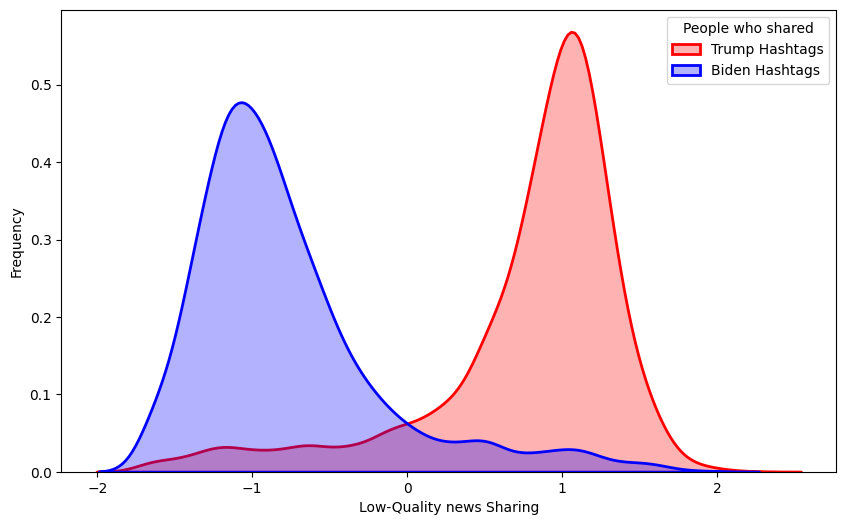

In [3]:
## Distributions of Relative Frequency of Low Quality

grouped_data = df.groupby('politics_hashtag')['lowqual_pr2019_fc'].apply(list).reset_index();
grouped_data = df.dropna(subset=['lowqual_pr2019_fc']).copy()
grouped_data['z_lowqual_pr2019_fc'] = zscore(grouped_data['lowqual_pr2019_fc'])

import matplotlib.pyplot as plt
import seaborn as sns

palette = {0: 'blue', 1: 'red'} 

plt.figure(figsize=(10, 6))
sns.kdeplot(data=grouped_data, 
            x='z_lowqual_pr2019_fc', 
            hue='politics_hashtag', # different distributions based on
            linewidth=2, 
            fill=True,  # inner color true
            alpha=0.3,  # transparency of fill
            common_norm=True,
           palette=palette)  #


plt.xlabel('Low-Quality news Sharing')
plt.ylabel('Frequency')
plt.legend(title='People who shared', labels=['Trump Hashtags', 'Biden Hashtags'])

plt.show()

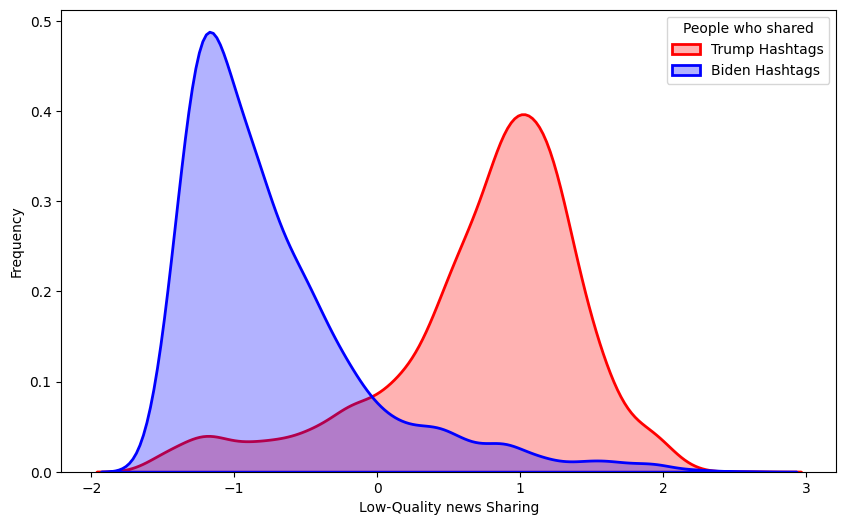

In [4]:

grouped_data = df.groupby('politics_hashtag')['lowqual_pr2019_fc'].apply(list).reset_index();
grouped_data = df.dropna(subset=['lowqual_pr2019_crowd']).copy()
grouped_data['z_lowqual_pr2019_crowd'] = zscore(grouped_data['lowqual_pr2019_crowd'])

palette = {0: 'blue', 1: 'red'} 

plt.figure(figsize=(10, 6))
sns.kdeplot(data=grouped_data, 
            x='z_lowqual_pr2019_crowd', 
            hue='politics_hashtag', # different distributions based on
            linewidth=2, 
            fill=True,  # inner color true
            alpha=0.3,  # transparency of fill
            common_norm=True,
           palette=palette) 


plt.xlabel('Low-Quality news Sharing')
plt.ylabel('Frequency')
plt.legend(title='People who shared', labels=['Trump Hashtags', 'Biden Hashtags'])

plt.show()

In [5]:
# Low-quality News Sharing on Twitter

def evaluate(d):
    abs_d = abs(d) 
    if abs_d>2 :
        return "Huge effect"
    elif abs_d > 1.20 :
        return "Very large"
    elif abs_d > 0.80 :
        return "Large"
    elif abs_d > 0.50 :
        return "Medium"

def find_d(column):    
    group0 = df[df['politics_hashtag'] == 0][column].dropna()
    group1 = df[df['politics_hashtag'] == 1][column].dropna()
    n0 = len(group0)
    n1 = len(group1)


    s0_pow_2 = group0.var(ddof=1)  # Variance for group 0 , ddof is degrees of freedom,is 1
    s1_pow_2 = group1.var(ddof=1)  # Variance for group 1

    s = ( ((n0 - 1) * s0_pow_2 + (n1 - 1) * s1_pow_2) / (n0 + n1 - 2) ) ** 0.5

    d =   ( group0.mean()  - group1.mean()) / s
    
    g = ( 1 - (3 / (4 * (n0 + n1) - 9)) ) 
    
    corrected_d = g * d
    
    t_stat = d * ((n0 * n1) / (n0 + n1)) ** 0.5
    evaluation = evaluate(corrected_d)
    
    return column, d, corrected_d, evaluation, t_stat
    #print(f"{column}, d: {d}, corrected with g: {corrected_d}, {evaluate(corrected_d)} | t:{t_stat} ")

data = {
    'Column': [],
    'd': [],
    'corrected with g':[],
    'Effect':[],
    't_statistic': [],   
}

columns =[
   "lowqual_pr2019_fc", "lowqual_afm", "lowqual_mbfc", "lowqual_lasser2019", "lowqual_pr2019_crowd",
    "lowqual_pr2019_crowdrep"
]

for column in columns:
    column, d, corrected_d, evaluation, t_stat = find_d(column)
    data['Column'].append(column)
    data['d'].append(d)
    data['corrected with g'].append(corrected_d)
    data['Effect'].append(evaluation) 
    data['t_statistic'].append(t_stat)

    
pd.options.display.float_format = '{:,.3f}'.format 
df_result = pd.DataFrame(data)
print(df_result.to_string(index=False))



                 Column      d  corrected with g      Effect  t_statistic
      lowqual_pr2019_fc -2.521            -2.521 Huge effect     -119.223
            lowqual_afm -2.165            -2.165 Huge effect     -102.678
           lowqual_mbfc -2.058            -2.057 Huge effect      -97.592
     lowqual_lasser2019 -2.164            -2.164 Huge effect     -102.634
   lowqual_pr2019_crowd -2.167            -2.167 Huge effect     -102.464
lowqual_pr2019_crowdrep -1.291            -1.291  Very large      -61.071


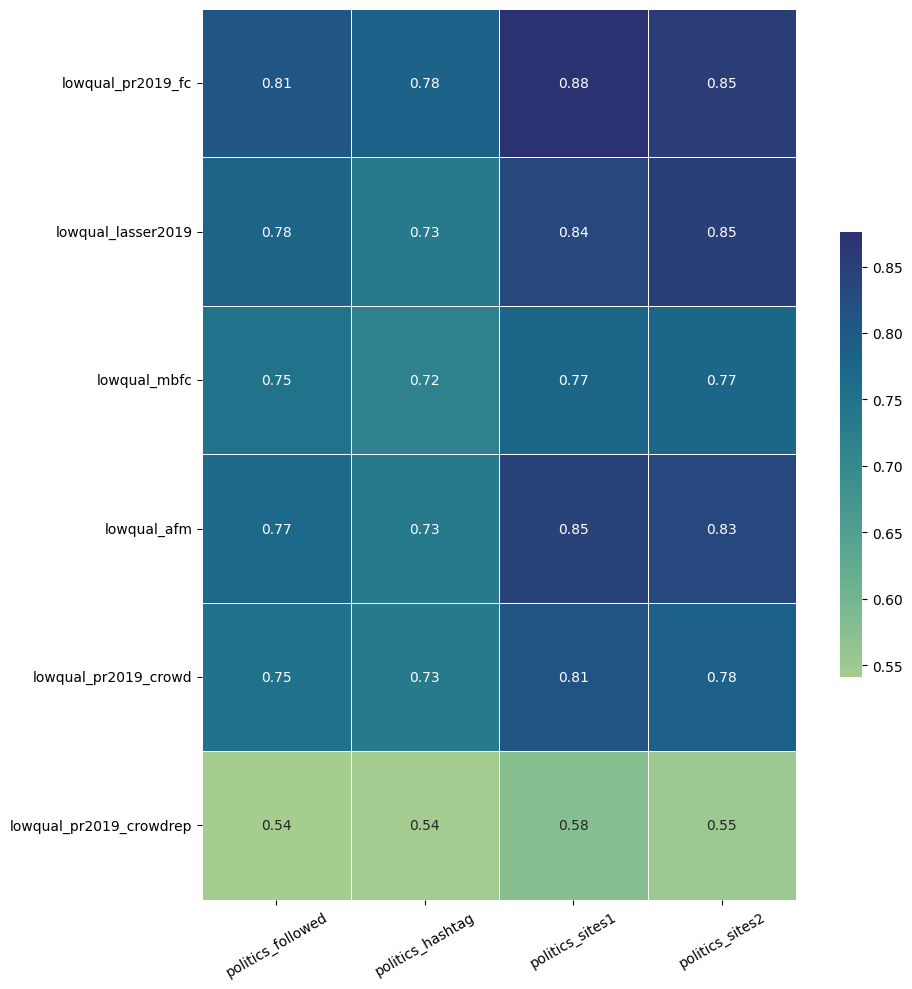

In [6]:
import numpy as np

# follow the example from dialekseis

# Select the relevant columns for the correlation
columns_to_select = [
    'lowqual_pr2019_fc', 'lowqual_lasser2019', 'lowqual_mbfc', 'lowqual_afm', 
    'lowqual_pr2019_crowd', 'lowqual_pr2019_crowdrep', 
    'politics_followed', 'politics_hashtag', 'politics_sites1', 'politics_sites2'
]

quantitative_predictors_df = df[columns_to_select]

corr = quantitative_predictors_df.corr()

# combinations 
corr = corr.loc[
    ['lowqual_pr2019_fc', 'lowqual_lasser2019', 'lowqual_mbfc', 'lowqual_afm', 
     'lowqual_pr2019_crowd', 'lowqual_pr2019_crowdrep'], 
    ['politics_followed', 'politics_hashtag', 'politics_sites1', 'politics_sites2'] 
]
mask = np.triu(np.ones_like(corr, dtype=bool))

f, ax = plt.subplots(figsize=(10, 10))

#cmap = sns.diverging_palette(230, 20, as_cmap=True)  # Dark blue to light green

sns.heatmap(corr,cmap="crest",
            square=True, annot=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.xticks(rotation=30)
plt.tight_layout()



           predictor   auc  upper CI  lower CI
    politics_hashtag 0.679     0.694     0.666
     politics_sites1 0.701     0.712     0.685
     politics_sites2 0.706     0.718     0.693
   politics_followed 0.686     0.702     0.670
         lowqual_afm 0.716     0.728     0.702
        lowqual_mbfc 0.707     0.720     0.692
  lowqual_lasser2019 0.705     0.721     0.685
   lowqual_pr2019_fc 0.699     0.712     0.685
lowqual_pr2019_crowd 0.685     0.699     0.671


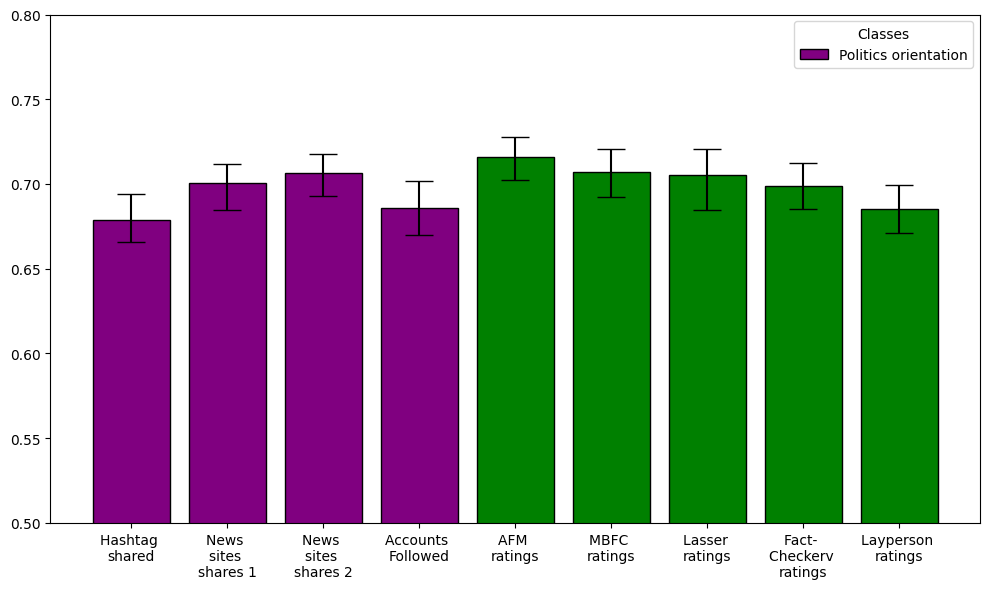

In [7]:
# News Sharing Can Help Explain Suspension, Using Single Predictors

from sklearn.metrics import roc_auc_score
from statsmodels.discrete.discrete_model import Probit
from statsmodels.tools import add_constant

cols = [
    "politics_hashtag",
    "politics_sites1",
    "politics_sites2",
    "politics_followed",
    "lowqual_afm",
    "lowqual_mbfc",
    "lowqual_lasser2019",
    "lowqual_pr2019_fc",
    "lowqual_pr2019_crowd"
]
target = "suspended"

# swap nan with mean of column
df.loc[:, df.columns != ''] = df.loc[:, df.columns != ''].fillna(df.mean())
# all the predictors are fine with mean_auc, lower_ci, upper_ci when nan is swapped with mean except from politics_followed
# when the nan rows are dropped, then all are wrong except politics_followed
# who knows..


def bootstrap(X, y):
    aucs = []
    for i in range(100):
        sample_indices = np.random.choice(len(y), len(y), replace=True)
        X_sample = X.iloc[sample_indices]
        y_sample = y.iloc[sample_indices]

        model = Probit(y_sample, X_sample).fit(disp=False)
        y_pred = model.predict(X_sample)

        auc = roc_auc_score(y_sample, y_pred)
        aucs.append(auc)

    lower = np.percentile(aucs, 2.5)
    upper = np.percentile(aucs, 97.5)
    return np.mean(aucs), lower, upper

aucs = [ [], [], [] ]
colors = []

# Half and half?
# Define custom labels
labels = {
    "politics_hashtag": "Hashtag \nshared",
    "politics_sites1": "News \nsites \nshares 1",
    "politics_sites2": "News \nsites \nshares 2",
    "politics_followed": "Accounts \nFollowed",
    "lowqual_afm": "AFM \nratings",
    "lowqual_mbfc": "MBFC \nratings",
    "lowqual_lasser2019": "Lasser \nratings",
    "lowqual_pr2019_fc": "Fact- \nCheckerv \nratings",
    "lowqual_pr2019_crowd": "Layperson \nratings"
}

for col in cols:
    
    # probit model
    X = add_constant(df[[col]])
    y = df[target]
    
    mean_auc, lower_ci, upper_ci = bootstrap(X, y)
    
    aucs[1].append(mean_auc)
    aucs[0].append(lower_ci)
    aucs[2].append(upper_ci)
    
    colors.append("purple" if "politics" in col else "green")


result = pd.DataFrame({
    "predictor": cols,
    "auc": aucs[1],
    "upper CI": aucs[2],
    "lower CI": aucs[0],
    "color": colors
})

print(result.drop(columns=["color"]).to_string(index=False))

def setColor():
    return "green"

plt.figure(figsize=(10, 6))
bars = plt.bar(result["predictor"], result["auc"], 
               yerr=[result["auc"] - result["lower CI"], 
                     result["upper CI"] - result["auc"]],
               capsize=10, color=result["color"], edgecolor="black")


plt.xticks(ticks=np.arange(len(result)), labels=[labels[p] for p in result["predictor"]], ha="center")
plt.ylim(0.5, 0.8)  
plt.legend(["Politics orientation", "Low-quality news sharing"], loc="upper right", title="Classes")

plt.tight_layout()
plt.show()


In [8]:
## News Sharing Can Help Explain Suspension, Using Multiple Predictors
from scipy.stats.mstats import winsorize

df['log_repeated_tweet_count'] = np.log10(df['repeated_tweet_count'] + 1)
df['log_freq_pr_1h'] = np.log10(df['freq_pr_1h'] + 1)
df['log_num_followers'] = np.log10(df['num_followers'] + 1)
df['log_num_friends'] = np.log10(df['num_friends'] + 1)
df['log_num_fol'] = np.log10((df['num_friends'] + 1) / (df['num_followers'] + 1))

# Winorise
from scipy.stats.mstats import winsorize

cols_to_winsorize = [
    'valence_neg',
    'valence_neu',
    'valence_pos',
    'barbera_std',
    'politics_sites1_std',
    'politics_sites2_ideo_std'
]

for col in cols_to_winsorize:
    df[col] = winsorize(df[col], limits=( 0.01, 0.01))

cols_to_winsorize = [
    'moral_outrage', 'rewire_abuse', 'rewire_hate', 'rewire_profanity', 'rewire_violent',
    'rewire_sexually_explicit', 'jigsaw_toxicity', 'jigsaw_severe_toxicity', 'jigsaw_idenity_attack',
    'jigsaw_insult', 'jigsaw_profanity', 'jigsaw_threat'
]
for col in cols_to_winsorize:
    df[col] = winsorize(df[col], limits=(0, 0.01))

    
# PCA component
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

def do_PCA(cols, new_dimension):

    # Standardize the variables
    scaler = StandardScaler()
    lowqual_scaled = scaler.fit_transform(df[cols])

    # Show the explained variance ratio
    pca = PCA(n_components=1)
    pca.fit(lowqual_scaled)

    explained_variance_ratio = pca.explained_variance_ratio_
    print(f"Explained variance ratio for {new_dimension} : {explained_variance_ratio[0]:.4f}")

    # project the low quality news sharing dimensions to this new dimension
    lowqual_projected = pca.transform(lowqual_scaled)
    df[new_dimension] = lowqual_projected.flatten()
    return pca

cols = ['lowqual_pr2019_fc', 'lowqual_afm', 'lowqual_lasser2019', 'lowqual_mbfc']
do_PCA( cols , 'pc1_misinfo')
cols = ['politics_hashtag', 'politics_followed', 'politics_sites1', 'politics_sites2']
do_PCA( cols, 'pc1_politics')

# Introduce a new variable, `extremity`, which is the absolute value of the PCA component you got.
df['extremity'] = df['pc1_misinfo'].abs()

cols = ['log_num_followers', 'log_num_friends', 'log_num_fol']
do_PCA( cols, 'pc1_fol')


Explained variance ratio for pc1_misinfo : 0.8726
Explained variance ratio for pc1_politics : 0.8795
Explained variance ratio for pc1_fol : 0.7046


PCA(n_components=1)

In [9]:
# Regarding the harmful language variables, perform PCA for *three* components, `pc1_harmful_language`, `pc2_harmful_language`, `pc3_harmful_language`
cols = [
    'rewire_abuse', 'rewire_hate', 'rewire_profanity', 'rewire_violent', 'rewire_sexually_explicit',
    'jigsaw_toxicity', 'jigsaw_severe_toxicity', 'jigsaw_idenity_attack', 'jigsaw_insult', 'jigsaw_profanity', 'jigsaw_threat'
]

scaler = StandardScaler()
harmful_language_scaled = scaler.fit_transform(df[cols])

pca = PCA(n_components=3)
pca.fit(harmful_language_scaled)
pca_components = pca.transform(harmful_language_scaled)

df['pc1_harmful_language'] = pca_components[:, 0]
df['pc2_harmful_language'] = pca_components[:, 1]
df['pc3_harmful_language'] = pca_components[:, 2]

print(f"Explained variance ratio for each component (pc1_harmful_language, pc2_harmful_language, pc3_harmful_language): {pca.explained_variance_ratio_}")

# Why use three components instead of one in this case? Try to interpret each of the principal components.
# Honestly, i don't really get it.

Explained variance ratio for each component (pc1_harmful_language, pc2_harmful_language, pc3_harmful_language): [0.5616608  0.11871792 0.10703707]


In [10]:
# Return to producing a single PCA component, `pc1_valence`

cols = ['valence_neg', 'valence_neu', 'valence_pos']
do_PCA( cols , 'pc1_valence')


Explained variance ratio for pc1_valence : 0.7079


PCA(n_components=1)

In [12]:
# Before proceeding, normalize the independent variables by taking their z-scores. You will use the following z-scored independent variables (winsorized as stated above):

from scipy.stats import zscore

# List of independent variables to normalize
# w_moral_outrage not exist, changed to moral_outrage
cols = [
    'pc1_politics', 'pc1_misinfo', 'pc1_fol',
    'pc1_harmful_language', 'pc2_harmful_language', 'pc3_harmful_language',
    'pc1_valence', 'tweets_in_2wk', 'botsentinel_score', 'extremity',
    'moral_outrage', 'liwc_political', 'log_freq_pr_1h',
    'log_repeated_tweet_count', 'barbera_std', 'politics_sites1_std',
    'politics_sites2_ideo_std'
]
# winorise & z-score
for col in cols:
    df[col] = winsorize(df[col], limits=(0, 0.01))
    df[col] = zscore(df[col])



In [13]:
# Carry out a probit regression to predict suspension.
cols = [
    'pc1_politics', 'pc1_misinfo', 'pc1_fol',
    'pc1_harmful_language', 'pc2_harmful_language', 'pc3_harmful_language',
    'pc1_valence', 'tweets_in_2wk', 'botsentinel_score', 'extremity',
    'moral_outrage', 'liwc_political', 'log_freq_pr_1h',
    'log_repeated_tweet_count', 'barbera_std', 'politics_sites1_std',
    'politics_sites2_ideo_std'
]
import statsmodels.api as sm
from statsmodels.formula.api import probit

formula = 'suspended ~ ' + ' + '.join(cols)
probit_model = probit(formula, data=df)

probit_result = probit_model.fit()
print("Probit Regression to predict Suspension")
print(probit_result.summary())



Optimization terminated successfully.
         Current function value: 0.304081
         Iterations 7
Probit Regression to predict Suspension
                          Probit Regression Results                           
Dep. Variable:              suspended   No. Observations:                 9000
Model:                         Probit   Df Residuals:                     8982
Method:                           MLE   Df Model:                           17
Date:                Sun, 08 Dec 2024   Pseudo R-squ.:                  0.1723
Time:                        22:25:23   Log-Likelihood:                -2736.7
converged:                       True   LL-Null:                       -3306.3
Covariance Type:            nonrobust   LLR p-value:                1.449e-231
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   -1.4152     

In [14]:
# Bonferroni correction

# decimals
pd.options.display.float_format = '{:,.6f}'.format 

def bonferroni_correction(results):
    p_values = results.pvalues
    adjusted_p_values = p_values * len(cols)
    print(f"\nAdjusted p-values with Bonferroni correction :\n",adjusted_p_values)

bonferroni_correction(probit_result)



Adjusted p-values with Bonferroni correction :
 Intercept                   0.000000
pc1_politics                0.318617
pc1_misinfo                 0.012480
pc1_fol                    11.070364
pc1_harmful_language        0.000000
pc2_harmful_language        0.007716
pc3_harmful_language        0.551331
pc1_valence                 0.670696
tweets_in_2wk               0.000000
botsentinel_score           0.000001
extremity                   6.806384
moral_outrage               5.946932
liwc_political              1.058567
log_freq_pr_1h              0.000000
log_repeated_tweet_count   14.215421
barbera_std                12.639631
politics_sites1_std         7.099976
politics_sites2_ideo_std    0.126065
dtype: float64


In [15]:
# Bonferroni-Holm 
import statsmodels.api as sm
from statsmodels.stats.multitest import multipletests

res= [ ]
def bonferroni_holm(results):
    m = len(cols)

    # Get the p-values from the Probit regression result
    p_values = results.pvalues
    sorted_by_values = p_values.sort_values()


    print("\nAdjusted p-values with Bonferroni-Holm correction")

    new_p_values = []
    X_values = []

    for i, (idx, p_value) in enumerate(sorted_by_values.items(), start=1):  # i is 1-based index   
        X = p_value * (m-i+1)
        capped_X = min(X, 1)
        X_values.append(capped_X)

        max_X = max(X_values) 
        new_p_values.append(max_X)
        res.append([idx, max_X])
    
    results_df = pd.DataFrame(res, columns=["column", "p-value"])

    print(results_df.to_string(index=False))
    
bonferroni_holm(probit_result)



Adjusted p-values with Bonferroni-Holm correction
                  column  p-value
               Intercept 0.000000
           tweets_in_2wk 0.000000
    pc1_harmful_language 0.000000
          log_freq_pr_1h 0.000000
       botsentinel_score 0.000001
    pc2_harmful_language 0.005447
             pc1_misinfo 0.008076
politics_sites2_ideo_std 0.074156
            pc1_politics 0.168680
    pc3_harmful_language 0.259450
             pc1_valence 0.276169
          liwc_political 0.373612
           moral_outrage 1.000000
               extremity 1.000000
     politics_sites1_std 1.000000
                 pc1_fol 1.000000
             barbera_std 1.000000
log_repeated_tweet_count 1.000000


In [16]:
# With logit regression
print("\nlogit Regression to predict Suspension")

from statsmodels.formula.api import logit
formula = 'suspended ~ ' + ' + '.join(cols)
logit_mod = logit(formula, data=df)
logit_res  = logit_mod.fit()

print("\n",logit_res.summary())
bonferroni_correction(logit_res)
bonferroni_holm(logit_res)



logit Regression to predict Suspension
Optimization terminated successfully.
         Current function value: 0.304813
         Iterations 7

                            Logit Regression Results                           
Dep. Variable:              suspended   No. Observations:                 9000
Model:                          Logit   Df Residuals:                     8982
Method:                           MLE   Df Model:                           17
Date:                Sun, 08 Dec 2024   Pseudo R-squ.:                  0.1703
Time:                        22:25:32   Log-Likelihood:                -2743.3
converged:                       True   LL-Null:                       -3306.3
Covariance Type:            nonrobust   LLR p-value:                9.609e-229
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   -2.5081   

**Conclusions**

Political orientation appears to correlate with higher suspension rates, but this relationship requires careful interpretation. Significant differences were found in the distribution of low-quality news sharing, suggesting that individuals with one political orientation are more likely to share low-quality content, which is strongly associated with higher suspension rates.

The probit models further indicate that the primary factors contributing to suspension are bot-like behavior, harmful language, and misinformation. These findings suggest that the disparities in suspension rates between political orientations are more likely due to differences in user behavior rather than inherent bias in platform policies. Specifically, conservative-leaning accounts tend to share more misinformation, engage in harmful language, and exhibit bot-like behavior.